In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss

In [61]:
dataframe = pd.read_csv('../../data/DailyDelhiClimateTrain.csv')
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe['date'] = dataframe['date'].dt.to_period('M').astype(str)
dataframe.drop(columns=['humidity', 'wind_speed', 'meanpressure'], inplace=True)
dataframe.drop(dataframe.index[-1], inplace=True)
dataframe

,date,meantemp
0,2013-01,10.000000
1,2013-01,7.400000
2,2013-01,7.166667
3,2013-01,8.666667
4,2013-01,6.000000
...,...,...
1456,2016-12,16.850000
1457,2016-12,17.217391
1458,2016-12,15.238095
1459,2016-12,14.095238


# Transformando os dados de diarios para mensais

In [62]:
dataframe = dataframe.groupby('date')['meantemp'].mean().reset_index()
dataframe.set_index('date', inplace=True)
dataframe

,meantemp
date,
2013-01,12.074770
2013-02,16.867560
2013-03,22.814209
2013-04,28.895119
2013-05,33.776767
2013-06,32.480873
2013-07,30.663594
2013-08,29.547773
2013-09,29.840595


In [63]:
px.line(dataframe, x=dataframe.index, y='meantemp')

# Plot de ACF e PACF

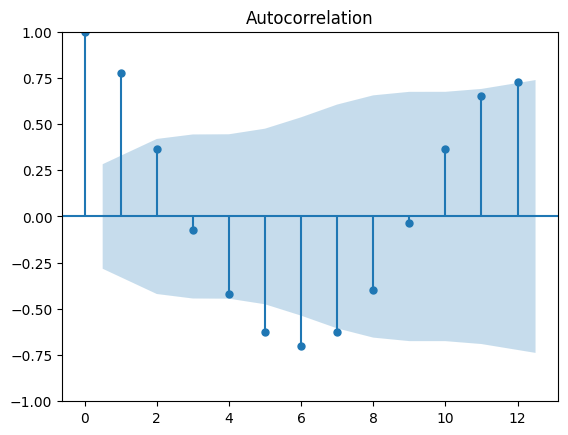

In [82]:
plot_acf(dataframe, lags=12)
plt.show()

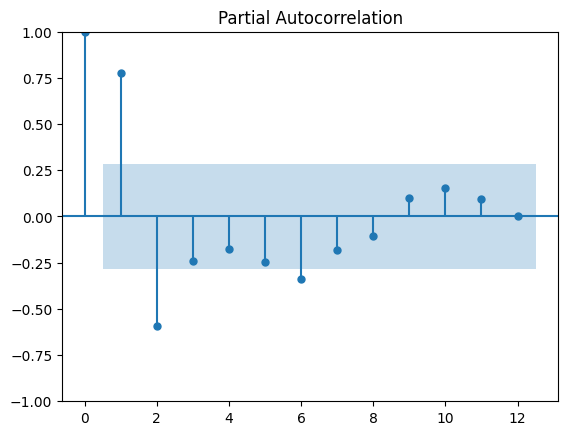

In [81]:
plot_pacf(dataframe, lags=12)
plt.show()

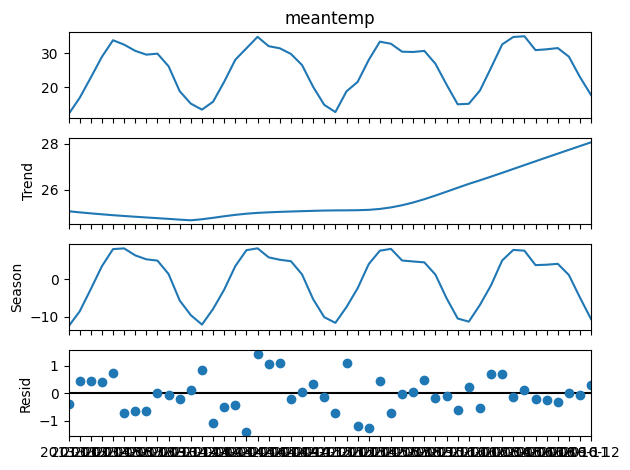

In [66]:
df_colum = dataframe['meantemp']
res = STL(df_colum, period=12).fit()
res.plot()
plt.show()

# Teste de estacionariedade 

In [67]:
result = adfuller(dataframe)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.29190286702070994
p-value: 0.9769699297633486


In [68]:
result = kpss(dataframe)
print('KPSS Statistic:', result[0])
print('p-value:', result[1])

KPSS Statistic: 0.0674196025615499
p-value: 0.1


C:\Users\golf\AppData\Local\Temp\ipykernel_12228\3319380636.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### Aplicando o ARMA

In [99]:
model =  ARIMA(dataframe,order=(12,0,1))
modelfit = model.fit()

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood opti

In [100]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                   48
Model:                ARIMA(12, 0, 1)   Log Likelihood                 -85.997
Date:                Sat, 25 May 2024   AIC                            201.994
Time:                        15:52:30   BIC                            230.062
Sample:                    01-01-2013   HQIC                           212.601
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5940      1.819     14.071      0.000      22.029      29.159
ar.L1         -0.0050      4.697     -0.001      0.999      -9.211       9.201
ar.L2          0.3995      3.543      0.113      0.910      -6.545       7.344
ar.L3         -0.2677      0.830     -0.323      0.747      -1.895       1.359
ar.L4         -0.0307      0.709     -0.043      0.965      -1.420       1.358
ar.L5         -0.0196      0.401     -0.049      0.961      -0.805       0.766
ar.L6          0.0097      0.411      0.024      0.981      -0.796       0.815
ar.L7         -0.0103      0.326     -0.032      0.975      -0.650       0.629
ar.L8          0.0796      0.374      0.213      0.831      -0.652       0.812
ar.L9         -0.1794      0.578     -0.311      0.756      -1.312       0.953
ar.L10        -0.1469      1.341     -0.110      0.913      -2.774       2.480
ar.L11         0.5497      0.376      1.461      0.144      -0.188       1.287
ar.L12         0.4001      2.284      0.175      0.861      -4.077       4.877
ma.L1          0.7500      4.795      0.156      0.876      -8.648      10.148
sigma2         1.5657      0.476      3.293      0.001       0.634       2.498
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.44   Prob(JB):                         0.76
Heteroskedasticity (H):               1.30   Skew:                             0.23
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
predict = modelfit.predict(start=len(dataframe), end=len(dataframe) + 12)

In [102]:
trace1 = go.Scatter(x=dataframe.index, y=dataframe['meantemp'], mode='lines', name='meantemp')
trace2 = go.Scatter(x=predict.index, y=predict.values, mode='lines', name='ARMA Predict')

# Configurar layout do gráfico
layout = go.Layout(
    title='Previsão da temperatura média',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Valores'),
    template='plotly_dark'
)

# Criar figura
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostrar gráfico
fig.show()